<a href="https://colab.research.google.com/github/IamHassanAb/Machine-Learning/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y  = mnist.data, mnist.target

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

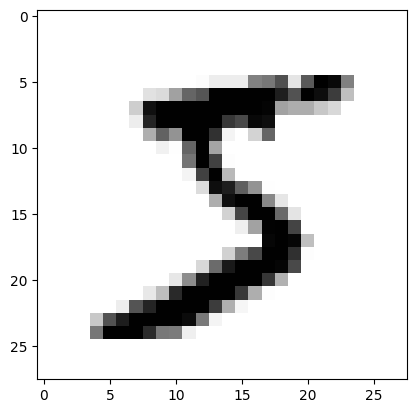

'5'

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  # plt.axis("off")

some_digit = X[0]

plot_digit(some_digit)
plt.show()
y[0]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
* For Example; Let's Create a "5-detector" (only 2 classes 5 or non-5)
* Let's use the Stochastic Gradient Descent (SGD, or stochastic GD) classifier.

In [ ]:
y_train_5  = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures
Measuring the performance of a `Classifier` is trickier than `Regressor`. So, our main focus for this chapter will be the evaluation of Classifiers

## Measure Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Wow! 95% accuracy. Let's test some other model and see how it performs.

Let's use the dummy classifier ( It is often used as a simple baseline for other classifiers and is expected to perform worse than more sophisticated models) which classifies every image in the most frequent class that is non-5 in our case

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print('Becuase only 10% images are 5s, so if we were to guess 100 times an image is not a 5, you will be correct 90 times.')

Becuase only 10% images are 5s, so if we were to guess 100 times an image is not a 5, you will be correct 90 times.


That is why the `accuracy` is not a prefered measure of evaluation. A much better evaluation method for `Classifiers` is the **`Confusion Matrix`**

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

**Precision and Recall**
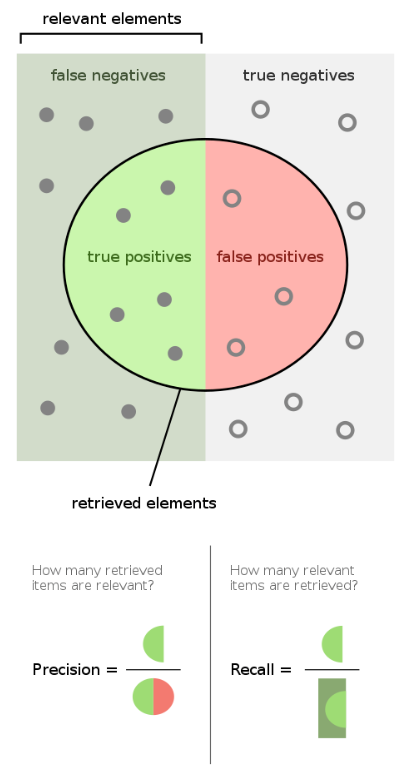

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

**F1 Score**

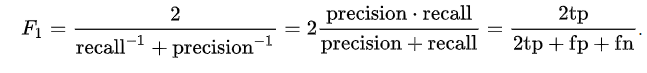

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### The Precision/Recall Trade-off


In [ ]:
print(f"""
This is the decision Function for SGDClassifier: {sgd_clf.decision_function([some_digit])}
The above score is a greater than threshold +ve class (5) else -ve class (non-5)""")


This is the decision Function for SGDClassifier: [2164.22030239]
The above score is a greater than threshold +ve class (5) else -ve class (non-5)


In [ ]:
y_scores = sgd_clf.decision_function([some_digit])

In [ ]:
threshold = 0
print(y_scores > threshold)
threshold = 3000
print(y_scores > threshold)


[ True]
[False]


In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

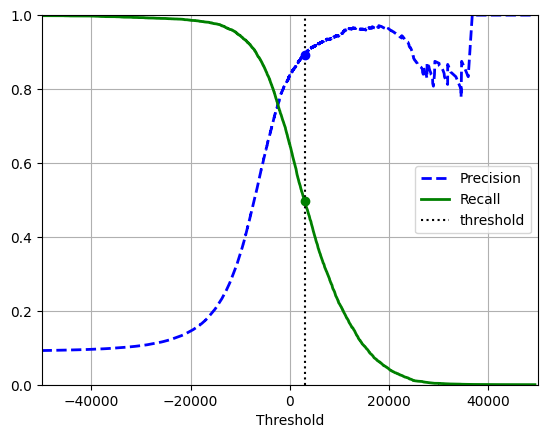

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",
linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

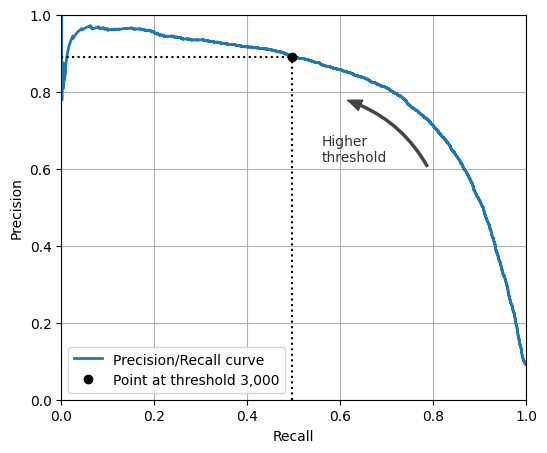

In [ ]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

### AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Now, let's compare it with the `RandomForestClassifier`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")
y_probs_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_probs_forest[:2, 1], y[:2]

(array([0.89, 0.01]), array(['5', '0'], dtype=object))

In [ ]:
y_scores_forest = y_probs_forest[:, 1]
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,
                                                                             y_scores_forest)

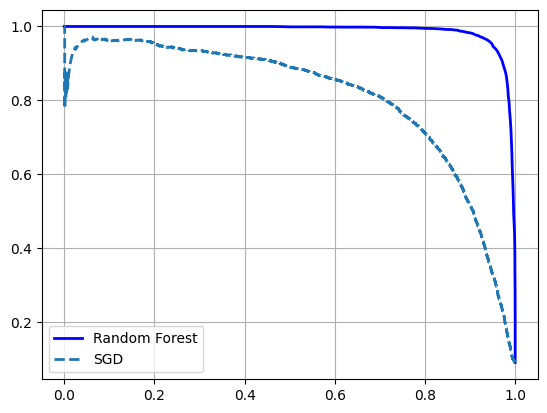

In [ ]:
plt.plot(recalls_forest,precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls,precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_train_pred_forest = y_probs_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
# logreg_clf = LogisticRegression(random_state=42)

In [ ]:
y_probs_logreg = cross_val_predict(pipe, X_train, y_train_5, cv=3,
                                   method="predict_proba")
y_probs_logreg[:2]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([[1.02600784e-01, 8.97399216e-01],
       [9.99840026e-01, 1.59974282e-04]])

In [ ]:
y_probs_logreg[:2, 1], y[:2]

(array([8.97399216e-01, 1.59974282e-04]), array(['5', '0'], dtype=object))

In [ ]:
y_scores_logreg = y_probs_logreg[:, 1]
precision_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(y_train_5,
                                                                             y_scores_logreg)

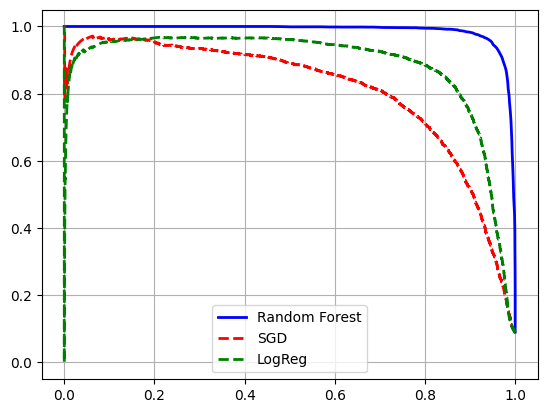

In [ ]:
plt.plot(recalls_forest,precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls,precisions, "r--", linewidth=2, label="SGD")
plt.plot(recalls_logreg,precision_logreg, "g--", linewidth=2, label="LogReg")
plt.legend()
plt.grid()
plt.show()

#Multiclass Classification

* We saw the bianry class classification that is we are only classifying from 2 classes (5/non-5s).
* Now, we will take a look at the Multiclass classification.
 * Note we can use a binary classifier for multiclass classification using **`(OvA): One vs All`** strategy Train 10 binary classifiers one for each digit (0-9). Then, Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.
* Another strategy is to train a binary classifier for every pair of digits `[(0,1),(0,2),(1,2) ...]`. If there are N classes, you need to train `N × (N – 1) / 2` classifiers. This is called **`one-versus-one`** strategy.
* The main advantage of **`OvO`** is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.

Let's use the SVC (Support Vector Machines Classifier) to perform Multi-class classification.
Sklearn automatically perform OvO or OvA/OvR technique when using binary classifiers for multiclass classification.(Depending on the Classifier)

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

OvO strategy is used

In [ ]:
class_id = some_digit_scores.argmax()
print("Index of the high scoring Class:", class_id)

Index of the high scoring Class: 5


In [ ]:
print("Classes",svm_clf.classes_)
print("Class using Index",svm_clf.classes_[class_id])

Classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Class using Index 5


(None, None)

If you want to force Scikit-learn to use `OneVsRestClassifier` or `OneVsOneClassifier`

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

#Error Analysis

* Frame the problem and look at the bigger picture.
* Get the Data
* Explore the Data
* Prepare the Data
* Shortlist Promising Models (We are here for error analysis)
* Fine Tune the System
* Present the Solution
* Launch!

#### 1. Confusion Matrix

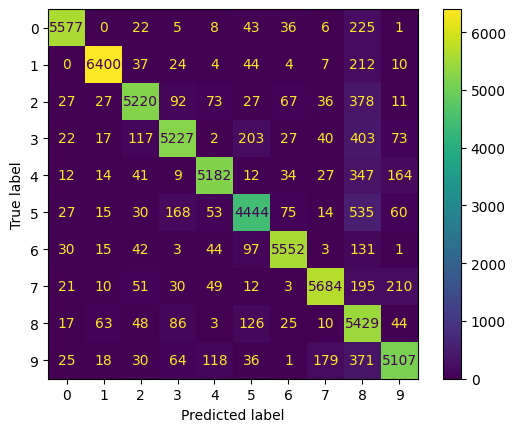

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

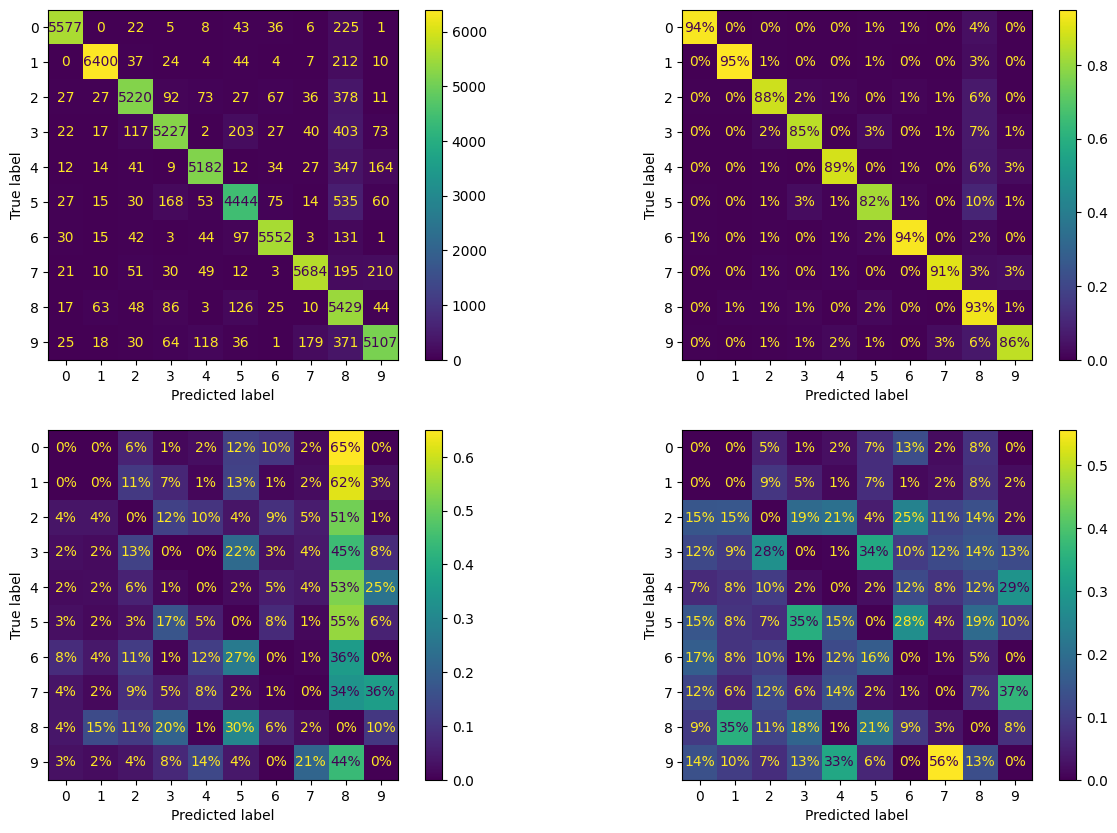

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axes[0,0])
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true",values_format=".0%", ax=axes[0,1])
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%", ax=axes[1,0])
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%", ax=axes[1,1])
plt.show()

# Multilabel Classification

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,
                                     X_train, y_multilabel, cv=3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

This approach assumes that all labels are equally important, which may not be
the case. In particular, if you have many more pictures of Alice than of Bob or
Charlie, you may want to give more weight to the classifier’s score on pictures
of Alice. One simple option is to give each label a weight equal to its support
(i.e., the number of instances with that target label). To do this, simply set
average="weighted" when calling the f1_score() function.

In [ ]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

Classifier chains is a machine learning method for problem transformation in multi-label classification.

# Multioutput Classification

**MultiOutput_MultiClass(Multioutput classification)**

In [ ]:
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

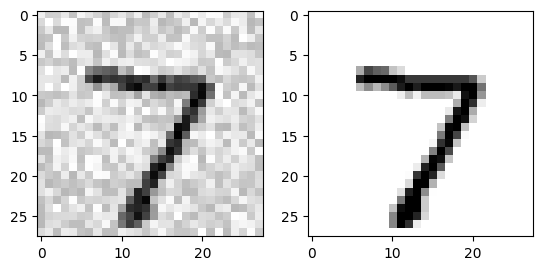

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

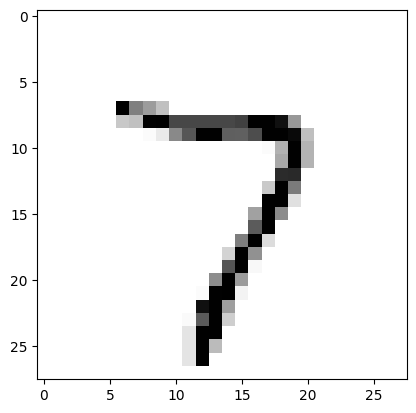

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()